In [32]:
from TDA import Mapper
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

Text(0.5, 1.0, 'Original Data')

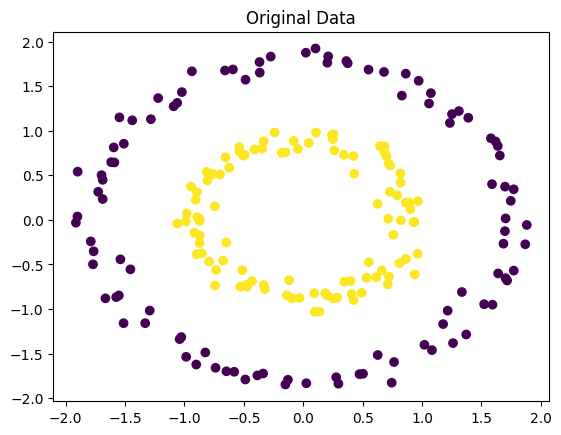

In [33]:
X, y = make_circles(n_samples=200, factor=0.5, noise=0.05, random_state=42)
X = StandardScaler().fit_transform(X)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title("Original Data")

In [34]:
def radial_lens(x):
    return np.linalg.norm(X, axis=1)

In [35]:
def simple_lens(x):
    return x

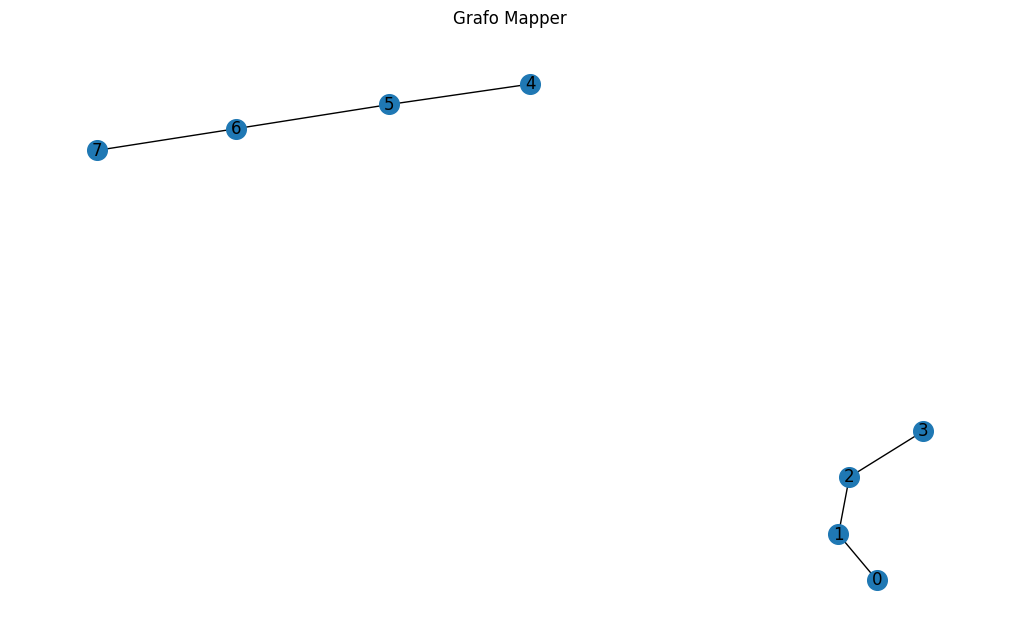

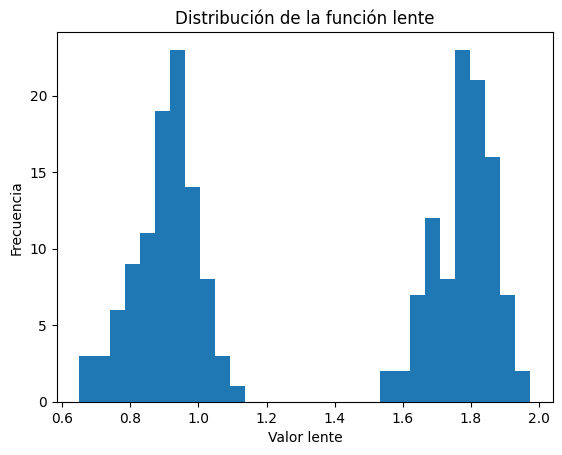

In [36]:
mapper_r = Mapper(
    lens_func=radial_lens,      
    n_intervals=11,               
    overlap=0.4,                  
    clusterer=DBSCAN(eps=3, min_samples=3),
    nerve_order= 3
)

mapper_r.fit(X)
mapper_r.plot(figsize=(10, 6))


In [37]:
mapper_r.nerve

[(0, 1), (1, 2), (2, 3), (4, 5), (5, 6), (6, 7)]

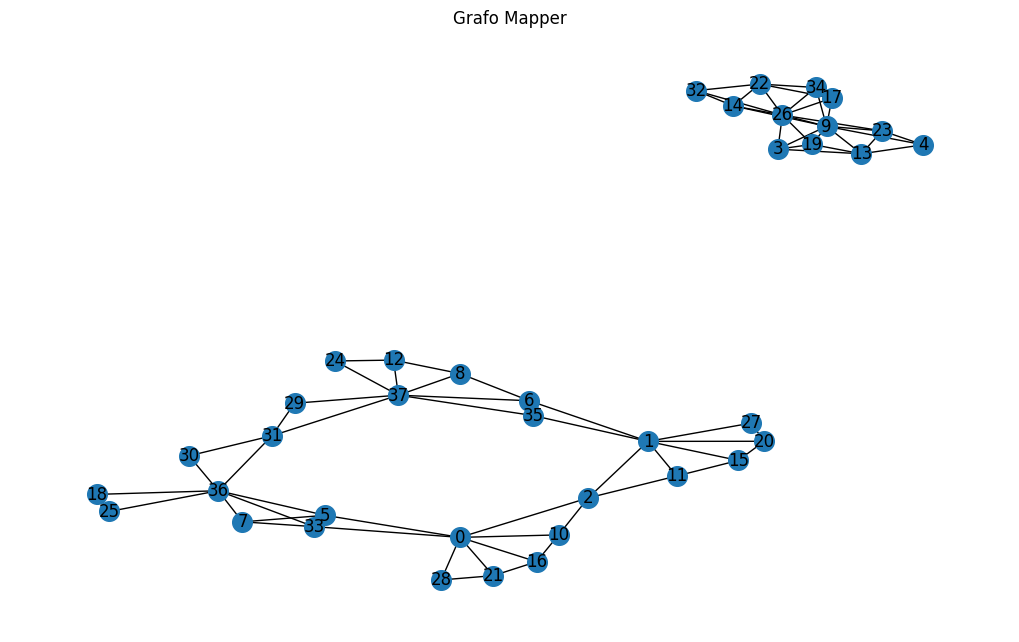

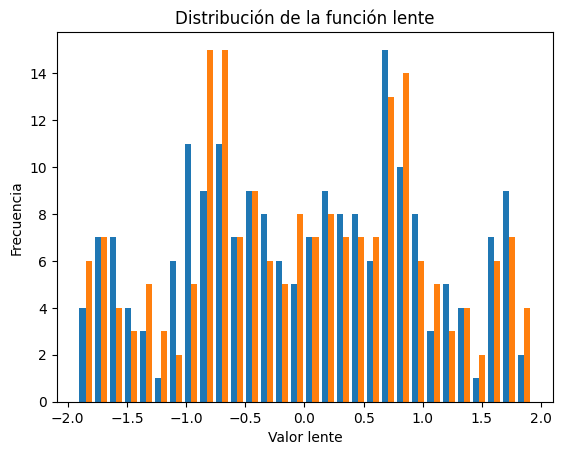

In [38]:
mapper_r = Mapper(
    lens_func=simple_lens,      
    n_intervals=8,               
    overlap=0.2,                  
    clusterer=DBSCAN(eps=0.4, min_samples=3),
    nerve_order= 5
)

mapper_r.fit(X)
mapper_r.plot(figsize=(10, 6))


In [39]:
mapper_r.nerve

[(0, 2),
 (0, 5),
 (0, 10),
 (0, 16),
 (0, 21),
 (0, 28),
 (0, 33),
 (1, 2),
 (1, 6),
 (1, 11),
 (1, 15),
 (1, 20),
 (1, 27),
 (1, 35),
 (2, 10),
 (2, 11),
 (3, 9),
 (3, 13),
 (3, 19),
 (3, 26),
 (4, 9),
 (4, 13),
 (4, 23),
 (5, 7),
 (5, 33),
 (5, 36),
 (6, 8),
 (6, 35),
 (6, 37),
 (7, 33),
 (7, 36),
 (8, 12),
 (8, 37),
 (9, 13),
 (9, 14),
 (9, 17),
 (9, 19),
 (9, 23),
 (9, 26),
 (9, 34),
 (10, 16),
 (11, 15),
 (12, 24),
 (12, 37),
 (13, 19),
 (13, 23),
 (14, 22),
 (14, 26),
 (14, 32),
 (15, 20),
 (16, 21),
 (17, 22),
 (17, 26),
 (17, 34),
 (18, 25),
 (18, 36),
 (19, 26),
 (20, 27),
 (21, 28),
 (22, 26),
 (22, 32),
 (22, 34),
 (23, 26),
 (24, 37),
 (25, 36),
 (26, 32),
 (26, 34),
 (29, 31),
 (29, 37),
 (30, 31),
 (30, 36),
 (31, 36),
 (31, 37),
 (33, 36),
 (35, 37),
 (0, 2, 10),
 (0, 5, 33),
 (0, 10, 16),
 (0, 16, 21),
 (0, 21, 28),
 (1, 2, 11),
 (1, 6, 35),
 (1, 11, 15),
 (1, 15, 20),
 (1, 20, 27),
 (3, 9, 13),
 (3, 9, 19),
 (3, 9, 26),
 (3, 13, 19),
 (3, 19, 26),
 (4, 9, 13),
 (4, 9,